In [2]:
import streamlit as st
import pandas as pd
import joblib
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

vct = joblib.load('tfidf_vectorizer.pkl')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('.\\Data\\final_df.xlsx')
df

,FullText,hoax
0,mantan gubernur dki jakarta anies baswedan had...,0
1,gubernur sumatera utara edy rahmayadi buka mun...,0
2,partai bangkit bangsa pkb bakal usung menteri ...,0
3,ketua umum partai bangkit nusantara pkn i gede...,0
4,dewan pimpin pusat dpp partai bangkit nusantar...,0
...,...,...
31303,foto raja salman angkat tandu korban crane tid...,1
31304,trik halftruth tampak jokowi sedang hormat tid...,1
31305,proyek pltu sebut benar jalan sejak tahun tahu...,1
31306,mata uang indonesia puruk dolar amerika lah ma...,1


In [10]:
X = df['FullText']
y = df['hoax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import pandas as pd

# Transform the data
X_train_vector = vct.transform(X_train)
X_test_vector = vct.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train_vector, y_train)

RandomForestClassifier()

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test_vector)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
accuracy

0.9750878313637815

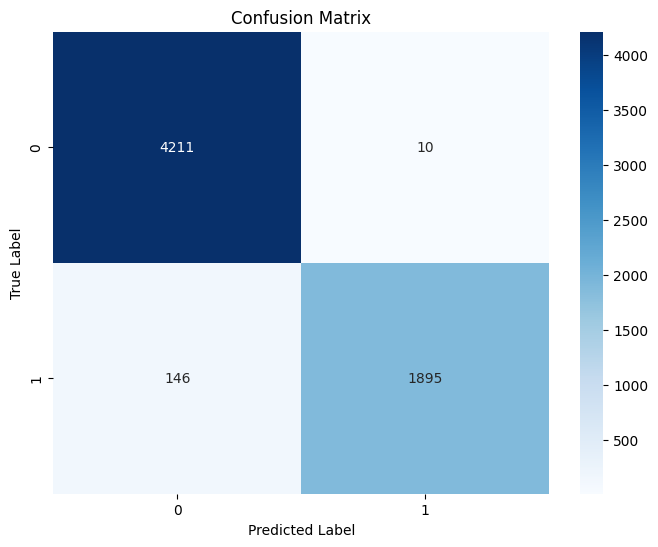

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4221
           1       0.99      0.93      0.96      2041

    accuracy                           0.98      6262
   macro avg       0.98      0.96      0.97      6262
weighted avg       0.98      0.98      0.97      6262



In [19]:
import joblib

model_rf = joblib.load('model_rf.joblib')

In [20]:
from sklearn.metrics import classification_report, accuracy_score

# Memprediksi label untuk data pengujian
y_pred = model_rf.predict(X_test_vector)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [21]:
accuracy

0.9955285851165762

In [22]:
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4221
           1       1.00      0.99      0.99      2041

    accuracy                           1.00      6262
   macro avg       1.00      0.99      0.99      6262
weighted avg       1.00      1.00      1.00      6262



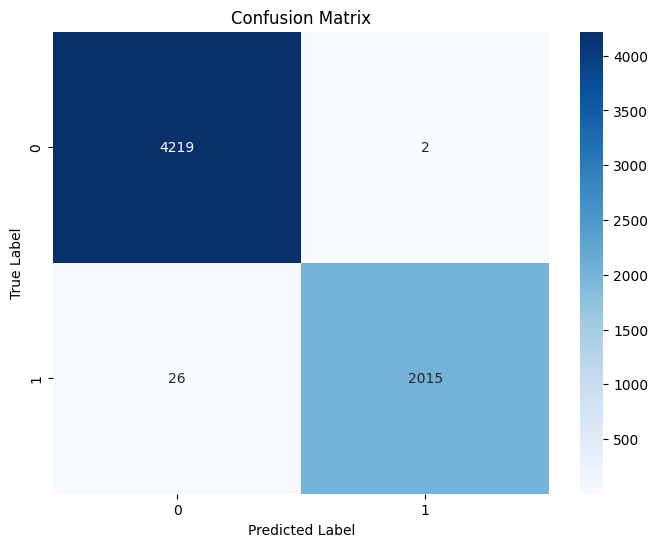

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()